In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'
TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"

In [4]:
CLEAN_REGION = 'Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [5]:
cluster_track_file_prod_gamma='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_gamma_0.03-2.0GeV_isotropic_uboone_test_cluster.root'
truth_studies_file_prod_gamma='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_gamma_0.03-2.0GeV_isotropic_uboone_test_TruthStudies.root'

In [6]:
Cluster_tree_prod_gamma = uproot.open(cluster_track_file_prod_gamma)[folder][TREE_CLUSTER]
Matching_tree_prod_gamma = uproot.open(cluster_track_file_prod_gamma)[folder][TREE_MATCHING]
Sps_tree_prod_gamma=uproot.open(truth_studies_file_prod_gamma)[folder_truth][TREE_SPS]


Event_tree_prod_gamma_truth=uproot.open(truth_studies_file_prod_gamma)[folder_truth][TREE_EVENT_TRUTH]
MCParticle_tree_prod_gamma_truth=uproot.open(truth_studies_file_prod_gamma)[folder_truth][TREE_MCPARTICLE_TRUTH]

In [7]:
# df_Matching_prod_gamma_=Matching_tree_prod_gamma_.pandas.df().query(CLEAN_REGION)

df_Matching_prod_gamma=Matching_tree_prod_gamma.pandas.df()

df_Cluster_prod_gamma=Cluster_tree_prod_gamma.pandas.df()

df_Correlation_prod_gamma_Sps=Sps_tree_prod_gamma.pandas.df()

df_Event_tree_prod_gamma=Event_tree_prod_gamma_truth.pandas.df()

df_MCParticle_tree_prod_gamma=MCParticle_tree_prod_gamma_truth.pandas.df()

In [8]:
df_Matching_prod_gamma.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
entry,,,,,,,,,,,,,,,,,,,,,
0,0.901704,2,0.898771,1,6.374023,2.0,6.191807e+223,3.599891e+227,488.999999,129.799203,...,0.898771,1.558846,0.173205,1631,9.177111e+170,9.881313e-323,9.881313e-323,4.545404e-322,4.545404e-322,8.214555e-316
1,0.319401,3,0.489513,4,12.257080,3.0,6.191807e+223,3.599891e+227,529.799999,143.725418,...,0.044500,148.783164,0.173205,1767,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.289943,2,-1.000000,0,6.000000,1.0,6.191807e+223,3.599891e+227,615.299999,137.879855,...,-1.000000,-9999.000000,0.173205,2051,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.141705,2,0.966618,2,6.167969,2.0,6.191807e+223,3.599891e+227,502.799999,132.511741,...,0.966618,81.233183,0.173205,1677,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.718661,2,0.777906,1,6.000000,1.0,6.191807e+223,3.599891e+227,505.199999,128.238112,...,0.777906,0.173205,0.173205,1684,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [9]:
df_Cluster_prod_gamma.head()

,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
entry,,,,,,
0,107.7,194.254634,0.000000,0.000000,1.000000e+10,0
1,107.7,194.254634,489.249481,130.434128,2.480016e+02,0
2,108.9,191.935607,489.249481,130.434128,1.000000e+10,0
3,108.9,191.935607,489.249481,130.434128,2.462528e+02,0
4,195.9,137.579144,489.249481,130.434128,1.000000e+10,0


In [10]:
df_Correlation_prod_gamma_Sps.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
entry,,,,,,,,,,,,,,,,,,,,,
0,371491407,129.810364,-1.628076,489.163086,506.096736,103.633919,1,1,1,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,0.646196,6.461958e-01
1,371491407,143.710999,-13.232817,529.965942,549.264835,46.223511,2,1,1,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,0.646196,1.000000e+10
2,371491407,137.879852,-91.261703,615.299988,637.129208,14.841970,2,1,1,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,0.646196,1.000000e+10
3,371491407,132.515610,-1.454871,502.925781,520.093112,52.842995,3,1,1,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,0.646196,1.000000e+10
4,371491407,128.238113,20.022558,505.200012,521.606143,25.268446,5,1,1,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,0.646196,1.000000e+10


In [11]:
df_Event_tree_prod_gamma.head()

,Event_Energy_total_MeV,Event_Energy_5_MeV,Event_Energy_10_MeV,Event_Energy_20_MeV,Event_Energy_30_MeV,Event_Energy_40_MeV,Event_Energy_50_MeV,Event_Energy_100_MeV,evttime,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
entry,,,,,,,,,,,,,,,,,,,,,
0,0.001473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371491407,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,1,1
1,0.002213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371491407,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,1,1
2,0.000904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371491407,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,1,1
3,0.000119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371491407,-9999.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,1,1
4,0.000998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371491407,0.0,...,0,0.0,1.317221e-43,0.0,0.0,0.0,1.000000e+10,0,1,1


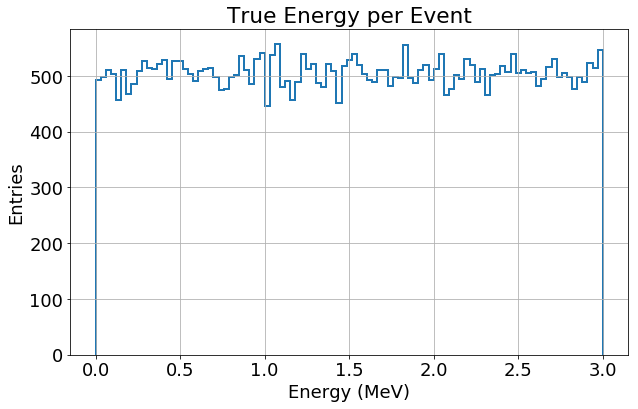

49990


In [12]:
# print df_Event_tree_prod_gamma['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)
df_Event_tree_prod_gamma['Event_Energy_total_MeV']= 1000* df_Event_tree_prod_gamma['Event_Energy_total_MeV'].values
plt.hist(df_Event_tree_prod_gamma['Event_Energy_total_MeV'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("True Energy per Event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
fig.savefig('True_gamma_energy_per_event.png', dpi=300)
print df_Event_tree_prod_gamma['Event_Energy_total_MeV'].shape[0]

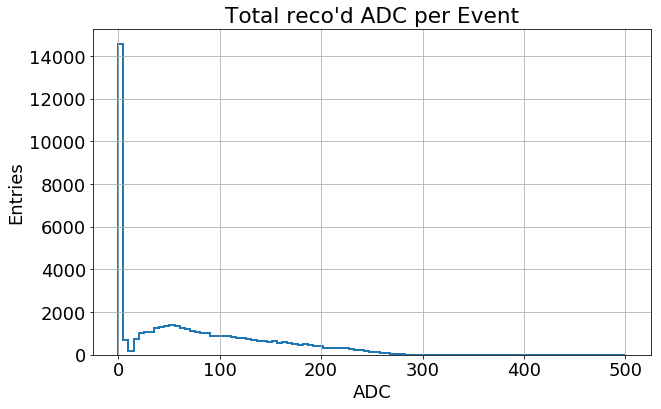

49990


In [13]:
# print df_Event_tree_prod_gamma['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,500,100)

plt.hist(df_Event_tree_prod_gamma['Event_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("Total reco'd ADC per Event")
plt.xlabel('ADC')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
print df_Event_tree_prod_gamma['Event_cluster_charge'].shape[0]

In [14]:
df_MCParticle_tree_prod_gamma.head()

,MC_Particle_Energy,position_X,position_Y,position_Z,pdg_particle
entry,,,,,
0,0.001473,128.0,0.0,500.0,1.358598e-307
1,0.002213,128.0,0.0,500.0,1.358598e-307
2,0.000904,128.0,0.0,500.0,1.358598e-307
3,0.000119,128.0,0.0,500.0,1.358598e-307
4,0.000998,128.0,0.0,500.0,1.358598e-307


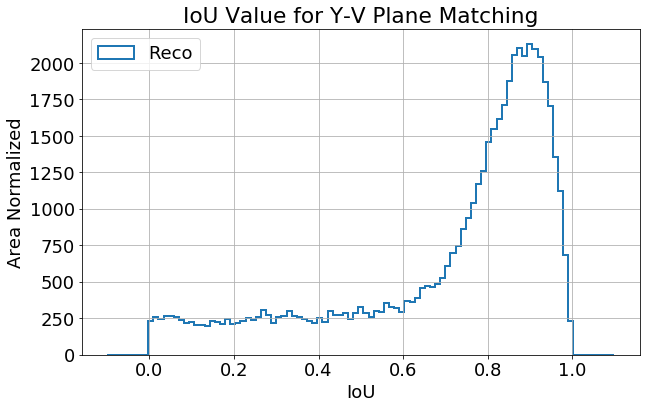

In [15]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)

plt.hist(df_Matching_prod_gamma['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

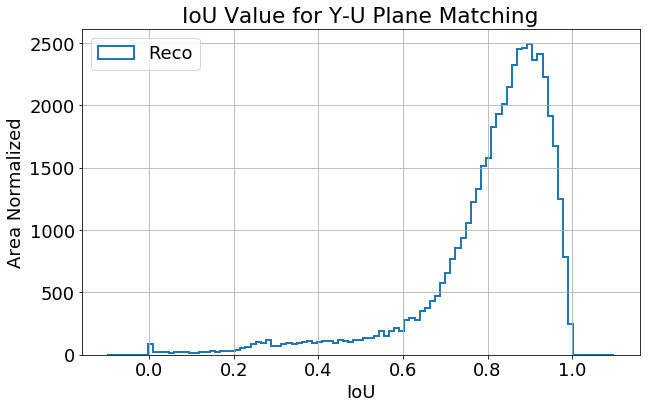

In [16]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)

plt.hist(df_Matching_prod_gamma['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

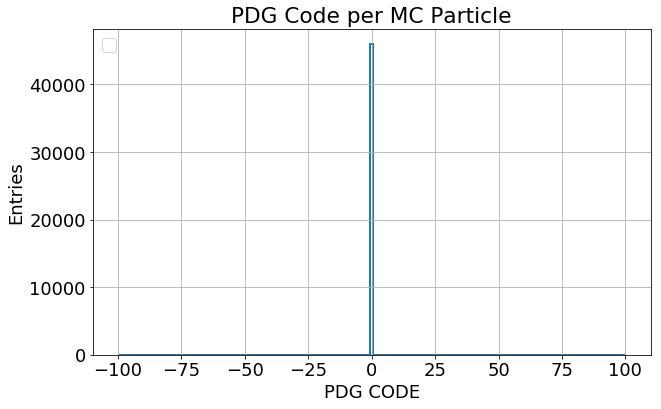

In [17]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-100,100,200)
plt.hist(df_MCParticle_tree_prod_gamma['pdg_particle'].values,bins=BINS,histtype='step',lw=2)

plt.title("PDG Code per MC Particle")
plt.xlabel('PDG CODE')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

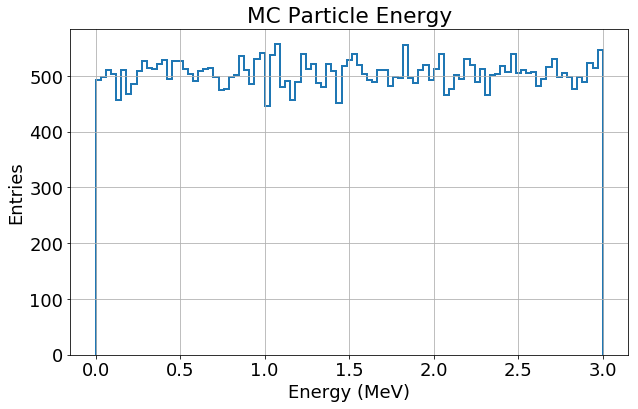

49990


In [18]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)
df_MCParticle_tree_prod_gamma['MC_Particle_Energy'] = 1000* df_MCParticle_tree_prod_gamma['MC_Particle_Energy'].values
plt.hist(df_MCParticle_tree_prod_gamma['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Energy")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
# plt.legend(loc=2)
plt.show()
print df_MCParticle_tree_prod_gamma.shape[0]

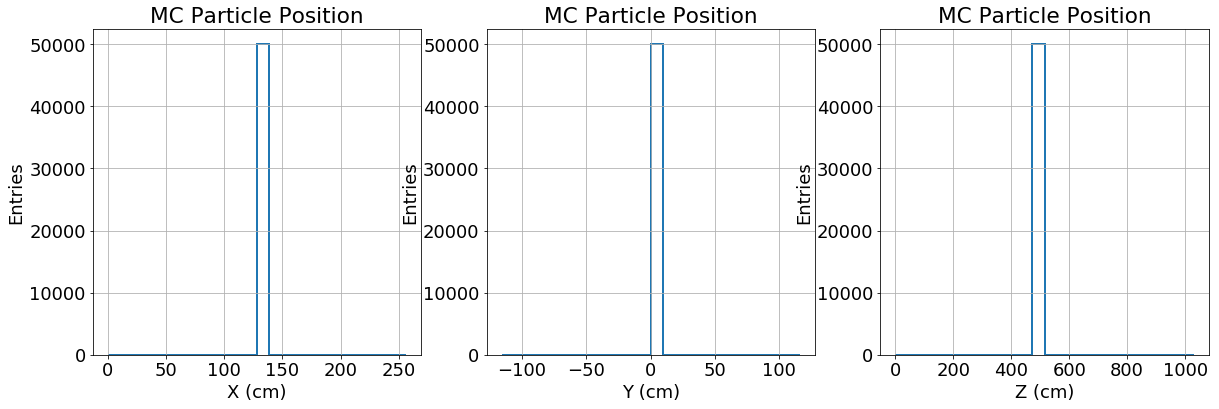

49990


In [19]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
BINS = np.linspace(0,256,25)

plt.hist(df_MCParticle_tree_prod_gamma['position_X'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('X (cm)')
plt.ylabel('Entries')
plt.grid()
# plt.legend(loc=2)
plt.subplot(1, 3, 2)
BINS = np.linspace(-116,116,25)

plt.hist(df_MCParticle_tree_prod_gamma['position_Y'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('Y (cm)')
plt.ylabel('Entries')
plt.grid()

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1030,25)

plt.hist(df_MCParticle_tree_prod_gamma['position_Z'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('Z (cm)')
plt.ylabel('Entries')
plt.grid()
plt.show()
print df_MCParticle_tree_prod_gamma.shape[0]

In [20]:
# df_Matching_prod_gamma_match=df_Matching_prod_gamma.query(MATCH_CUT)
# df_Matching_prod_gamma_3tick_match=df_Matching_prod_gamma_3tick.query(MATCH_CUT)
df_Matching_prod_gamma_match=df_Matching_prod_gamma.query(MATCH_CUT)
# df_Matching_prod_gamma_1tick_corrected_match=df_Matching_prod_gamma_1tick_corrected.query(MATCH_CUT)

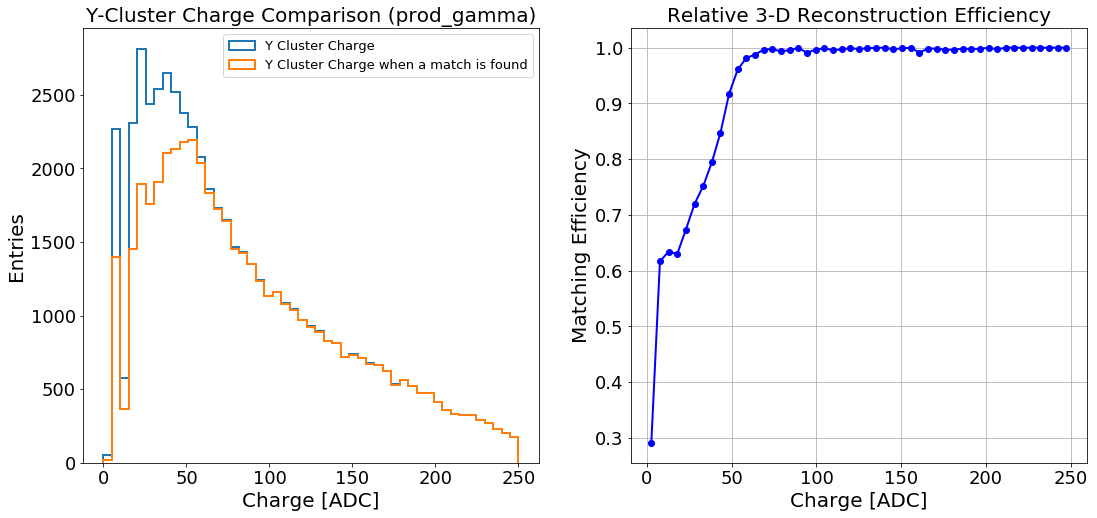

In [21]:
fig = plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,250,50)
plt.hist(df_Matching_prod_gamma['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_prod_gamma_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (prod_gamma)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(0,250,50)

vals2D_prod_gamma, bins2D_prod_gamma = np.histogram(df_Matching_prod_gamma['Y_cluster_charge'].values,bins=BINS)
vals3D_prod_gamma, bins3D_prod_gamma = np.histogram(df_Matching_prod_gamma_match['Y_cluster_charge'].values,bins=BINS)
binC_prod_gamma = 0.5*(bins2D_prod_gamma[1:]+bins2D_prod_gamma[:-1])
vals2D_prod_gamma = vals2D_prod_gamma.astype(float)
#print vals2D
vals3D_prod_gamma = vals3D_prod_gamma.astype(float)
ratio_v_prod_gamma = []
for i,v in enumerate(vals2D_prod_gamma):
    if (v == 0):
        ratio_v_prod_gamma.append(0.)
    else:
        ratio_v_prod_gamma.append(vals3D_prod_gamma[i]/v)
#print ratio_v
plt.plot(binC_prod_gamma,ratio_v_prod_gamma,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.show()


In [22]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

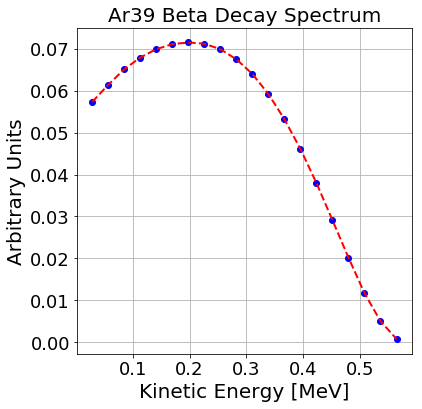

In [23]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

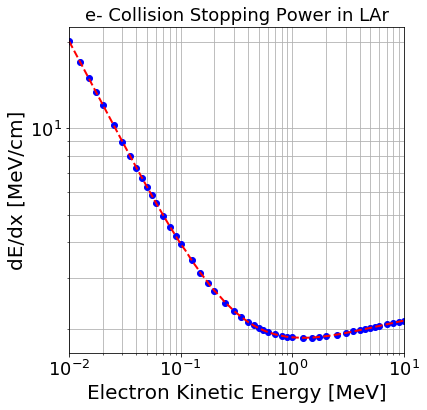

In [24]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

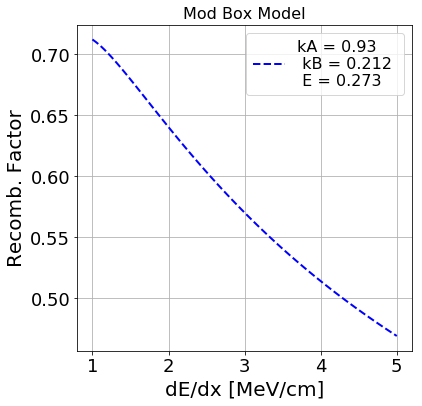

In [25]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

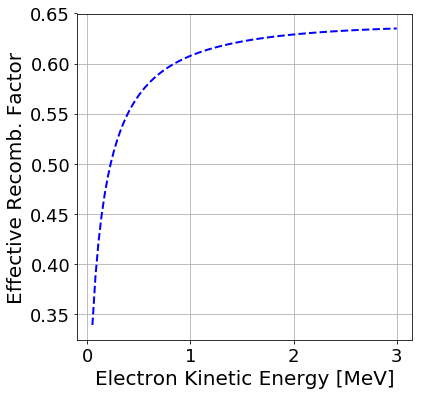

In [26]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



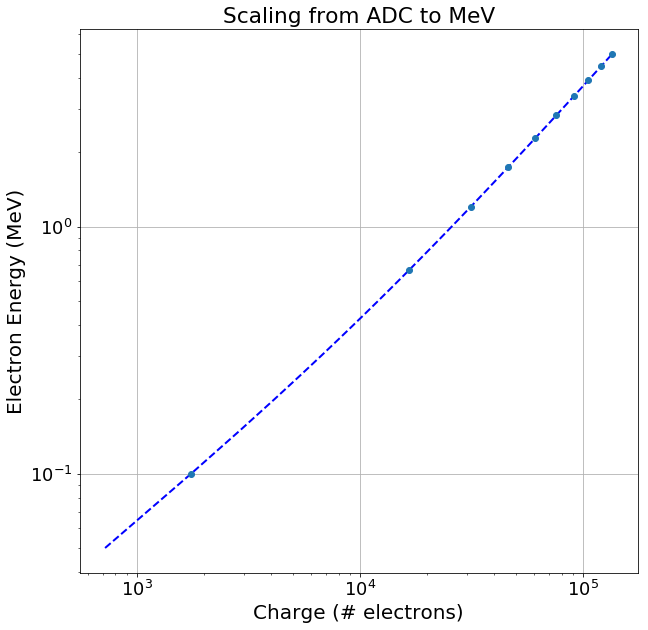

In [27]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [28]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.236765320538


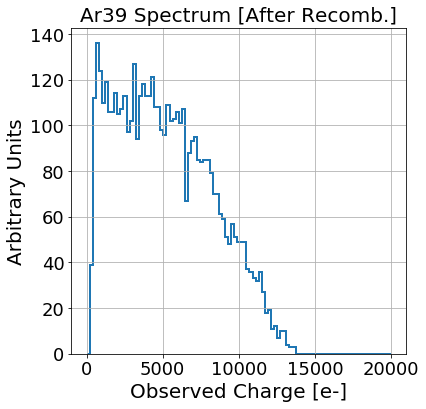

In [29]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [30]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

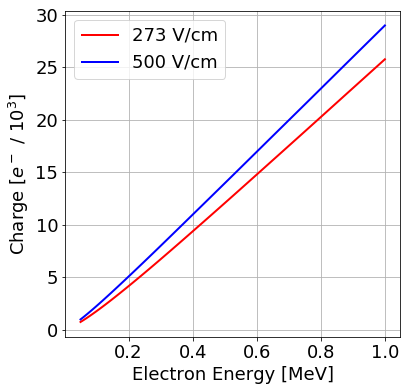

In [31]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [32]:

def E_recoY_prod_gamma(df,gain):
    YQ_prod_gamma = df['Y_cluster_charge']
    QrecoY_prod_gamma = YQ_prod_gamma * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_prod_gamma = fQ2E(QrecoY_prod_gamma)
    return ErecoY_prod_gamma


def E_recoU_prod_gamma(df,gain):
    UQ_prod_gamma = df['U_cluster_charge']
    QrecoU_prod_gamma = UQ_prod_gamma * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_prod_gamma = fQ2E(QrecoU_prod_gamma)
    return ErecoU_prod_gamma



def E_recoV_prod_gamma(df,gain):
    VQ_prod_gamma = df['V_cluster_charge']
    QrecoV_prod_gamma = VQ_prod_gamma * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_prod_gamma = fQ2E(QrecoV_prod_gamma)
    return ErecoV_prod_gamma


def E_sps_event(df,gain):
    Q_sps_event = df['Event_cluster_charge']
    Qreco_sps_event = Q_sps_event * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps_event = fQ2E(Qreco_sps_event)
    return Ereco_sps_event

def E_sps(df,gain):
    Q_sps = df['sps_cluster_charge']
    Qreco_sps = Q_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps = fQ2E(Qreco_sps)
    return Ereco_sps




In [33]:



dfcut_match_prod_gamma = df_Matching_prod_gamma_match.query('Y_cluster_charge* 238.4 >0.')
dfcut_all_prod_gamma   = df_Matching_prod_gamma.query('Y_cluster_charge* 238.4 > 0.')



dfcut_match_prod_gamma['energy'] = E_recoY_prod_gamma(dfcut_match_prod_gamma,238.4)
dfcut_all_prod_gamma['energy']   = E_recoY_prod_gamma(dfcut_all_prod_gamma,238.4)



df_charge_conversion=df_Event_tree_prod_gamma.query('Event_cluster_charge > 0.')

df_charge_conversion['energy'] = E_sps_event(df_charge_conversion,238.4)


df_sps_charge_conversion=df_Correlation_prod_gamma_Sps.query('sps_cluster_charge > 0.')

df_sps_charge_conversion['energy'] = E_sps(df_sps_charge_conversion,238.4)


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


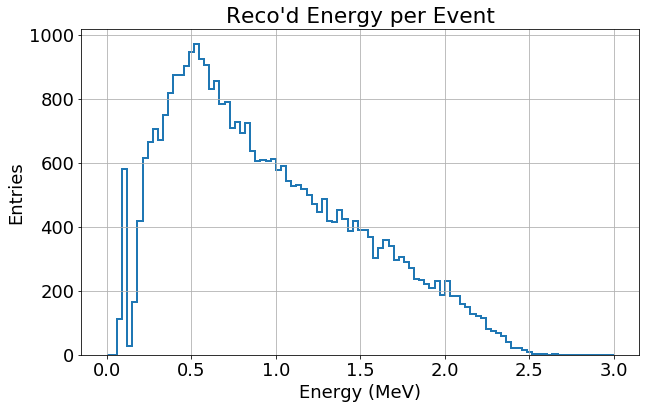

35438


In [34]:
# print df_Event_tree_prod_gamma['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)

plt.hist(df_charge_conversion['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("Reco'd Energy per Event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
fig.savefig('Reco_gamma_energy_per_event.png', dpi=300)

print(df_charge_conversion['energy'].shape[0])


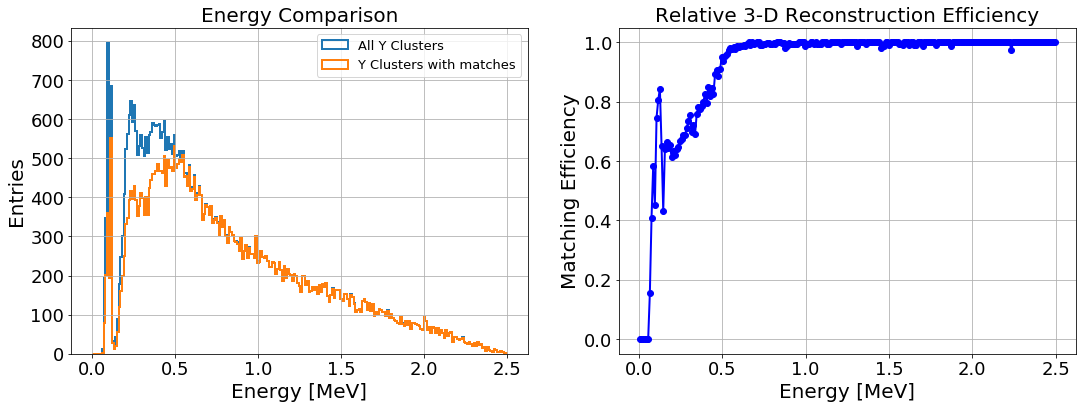

Minimum energy for any cluster on Y-Plane: 0.0657320096849712 MeV
Minimum energy for 3-D reco'd cluster on Y-Plane: 0.06963656906299778 MeV
maximum energy for any cluster on Y-Plane: 2.645003167553509 MeV
maximum energy for 3-D reco'd cluster on Y-Plane: 2.645003167553509 MeV
54570
49015


In [35]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2.5,250)
plt.hist(dfcut_all_prod_gamma['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_prod_gamma['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0,2.5,250)

vals2D_prod_gamma, bins2D_prod_gamma = np.histogram(dfcut_all_prod_gamma['energy'].values,bins=BINS)
vals3D_prod_gamma, bins3D_prod_gamma = np.histogram(dfcut_match_prod_gamma['energy'].values,bins=BINS)
binC_prod_gamma = 0.5*(bins2D_prod_gamma[1:]+bins2D_prod_gamma[:-1])
vals2D_prod_gamma = vals2D_prod_gamma.astype(float)
#print vals2D
vals3D_prod_gamma = vals3D_prod_gamma.astype(float)
ratio_v_prod_gamma = []
for i,v in enumerate(vals2D_prod_gamma):
    if (v == 0):
        ratio_v_prod_gamma.append(0.)
    else:
        ratio_v_prod_gamma.append(vals3D_prod_gamma[i]/v)
#print ratio_v
plt.plot(binC_prod_gamma,ratio_v_prod_gamma,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.grid()
plt.show()
fig.savefig('relative_efficiency.png', dpi=300)
print "Minimum energy for any cluster on Y-Plane:", dfcut_all_prod_gamma['energy'].min(), "MeV"
print "Minimum energy for 3-D reco'd cluster on Y-Plane:", dfcut_match_prod_gamma['energy'].min(), "MeV"
print "maximum energy for any cluster on Y-Plane:", dfcut_all_prod_gamma['energy'].max(), "MeV"
print "maximum energy for 3-D reco'd cluster on Y-Plane:", dfcut_match_prod_gamma['energy'].max(), "MeV"
print dfcut_all_prod_gamma['energy'].shape[0]
print dfcut_match_prod_gamma['energy'].shape[0]

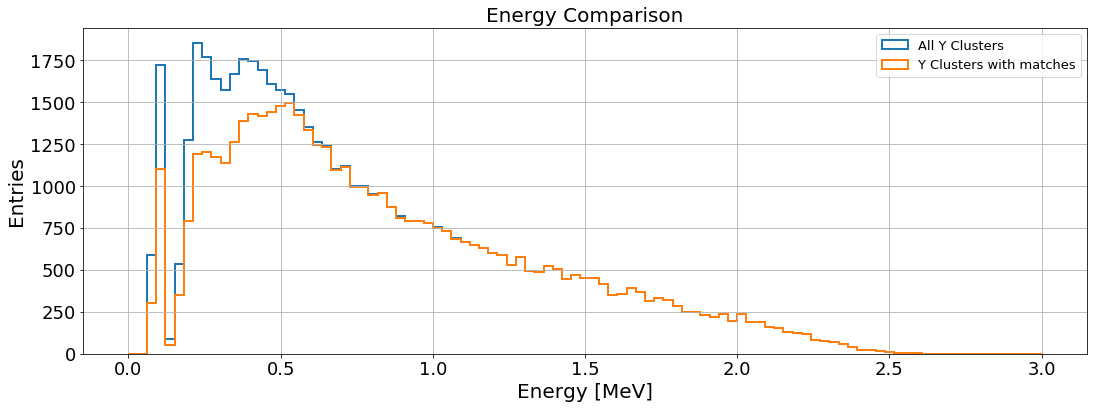

In [36]:
fig = plt.figure(figsize=(18,6))


BINS = np.linspace(0,3,100)
plt.hist(dfcut_all_prod_gamma['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_prod_gamma['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.show()

In [37]:
#print (df_Event_tree_prod_gamma['Event_cluster_charge'].to_string())

In [38]:
#print (df_Event_tree_prod_gamma['Event_Energy_100_MeV'].to_string())

In [39]:
print (len(dfcut_match_prod_gamma['energy'].values))
print (len(df_Event_tree_prod_gamma['Event_Energy_100_MeV'].values))
print (len(df_charge_conversion['energy'].values))
print(len(df_Event_tree_prod_gamma['Event_cluster_charge'].values))

49015
49990
35438
49990


In [40]:
# df_charge_conversion['Event_Energy_100_MeV']= 1000*df_charge_conversion['Event_Energy_100_MeV'].values
# print (df_Event_tree_prod_gamma['Event_cluster_charge'].to_string())
print (df_charge_conversion['energy'].shape[0])
print (df_charge_conversion['Event_Energy_total_MeV'].shape[0])

#electron mass=0.511 MeV
df_charge_conversion['Event_Energy_total_MeV']=df_charge_conversion['Event_Energy_total_MeV']-0.511

35438
35438


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [41]:
#print (df_charge_conversion['Event_Energy_total_MeV'].to_string())

In [42]:
#print (df_charge_conversion['energy'].to_string())

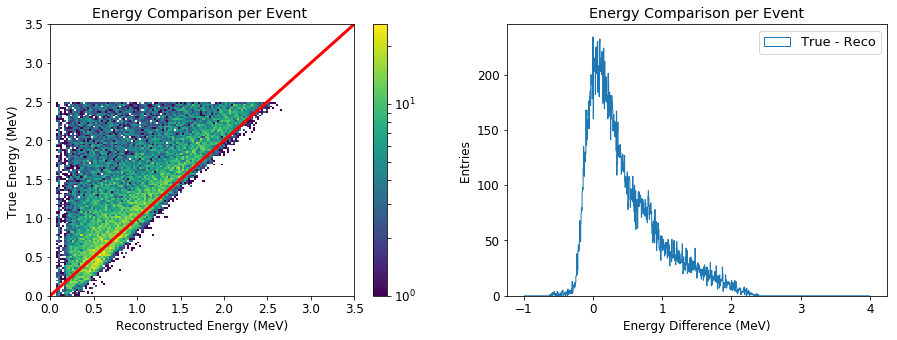

In [43]:
fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 12})
plt.subplot(1, 2, 1)
plt.hist2d(df_charge_conversion['energy'].values,df_charge_conversion['Event_Energy_total_MeV'].values, bins=(150,150), range=[[0,3.5], [0,3.5]], norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.ylabel('True Energy (MeV) ')
plt.xlabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')
plt.subplot(1, 2, 2)
BINS = np.linspace(-1,4,1000)
plt.hist((df_charge_conversion['Event_Energy_total_MeV']-df_charge_conversion['energy']).values,label='True - Reco',bins=BINS,histtype='step')
plt.ylabel('Entries ')
plt.xlabel('Energy Difference (MeV)')
plt.title('Energy Comparison per Event')
plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('energy_resolution.png', dpi=500)

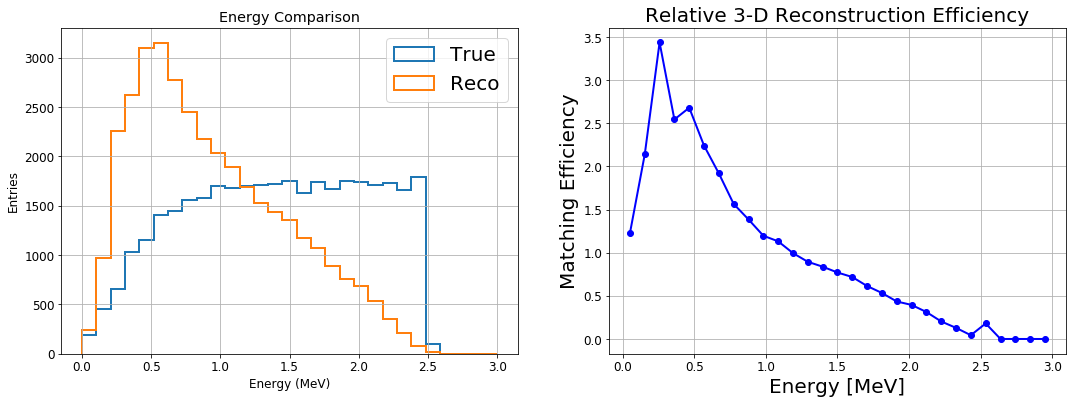

In [44]:
# print df_Event_tree_prod_gamma['Event_Energy_total_MeV']
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,3,30)

plt.hist(df_charge_conversion['Event_Energy_total_MeV'].values,bins=BINS,histtype='step',lw=2,label='True')
plt.hist(df_charge_conversion['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco')



plt.title("Energy Comparison")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1,fontsize=20)

plt.subplot(1, 2, 2)
vals_true_prod_gamma, bins_true_prod_gamma = np.histogram(df_charge_conversion['Event_Energy_total_MeV'].values,bins=BINS)
vals_reco_prod_gamma, bins_reco_prod_gamma = np.histogram(df_charge_conversion['energy'].values,bins=BINS)
binC_prod_gamma = 0.5*(bins_true_prod_gamma[1:]+bins_true_prod_gamma[:-1])
vals_true_prod_gamma = vals_true_prod_gamma.astype(float)
#print vals_true
vals_reco_prod_gamma = vals_reco_prod_gamma.astype(float)
ratio_v_prod_gamma = []
for i,v in enumerate(vals_true_prod_gamma):
    if (v == 0):
        ratio_v_prod_gamma.append(0.)
    else:
        ratio_v_prod_gamma.append(vals_reco_prod_gamma[i]/v)
#print ratio_v
plt.plot(binC_prod_gamma,ratio_v_prod_gamma,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.grid()

plt.show()
fig.savefig('absolute_efficiency.png', dpi=300)

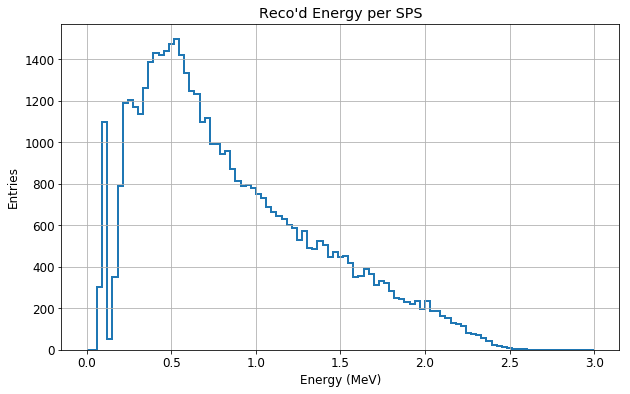

49015


In [45]:
# print df_Event_tree_prod_gamma['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)

plt.hist(df_sps_charge_conversion['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("Reco'd Energy per SPS")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
print(df_sps_charge_conversion['energy'].shape[0])


In [46]:
print df_Correlation_prod_gamma_Sps.shape[0]
df_true_x=pd.DataFrame(np.random.randint(128,129,size=df_Correlation_prod_gamma_Sps.shape[0]))
df_true_y=pd.DataFrame(np.random.randint(0,1,size=df_Correlation_prod_gamma_Sps.shape[0]))
df_true_z=pd.DataFrame(np.random.randint(500,501,size=df_Correlation_prod_gamma_Sps.shape[0]))

# print df_true_x.shape[0]
#print df_Correlation_prod_gamma_Sps['sps_x'].to_string()
# df_true_x.describe()

49015


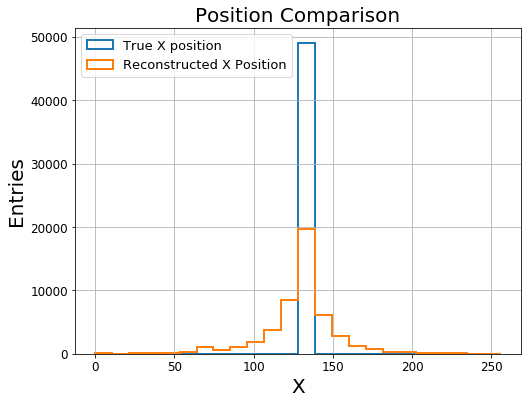

In [47]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(0,256,25)
plt.hist(df_true_x.values, bins=BINS,histtype='step',lw=2,label='True X position')
plt.hist(df_Correlation_prod_gamma_Sps['sps_x'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed X Position')
plt.xlabel("X",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_x-df_Correlation_prod_gamma_Sps['sps_x']).values, bins=BINS,histtype='step',lw=2)
# plt.xlabel("Difference",fontsize=20)
# plt.ylabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('X-comparison_single_gamma.png', dpi=300)

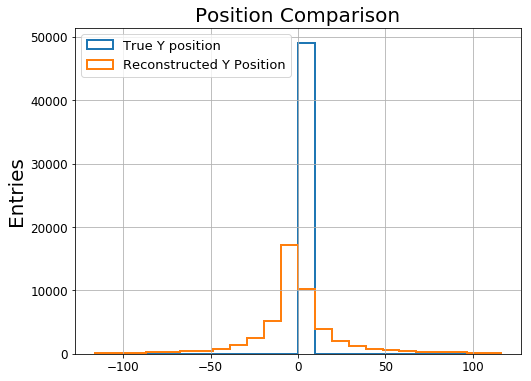

In [48]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(-116,116,25)
plt.hist(df_true_y.values, bins=BINS,histtype='step',lw=2,label='True Y position')
plt.hist(df_Correlation_prod_gamma_Sps['sps_y'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed Y Position')
plt.ylabel("y",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_y-df_Correlation_prod_gamma_Sps['sps_y']).values, bins=BINS,histtype='step',lw=2)
# plt.ylabel("Difference",fontsize=20)
# plt.ylabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('y-comparison_single_gamma.png', dpi=300)

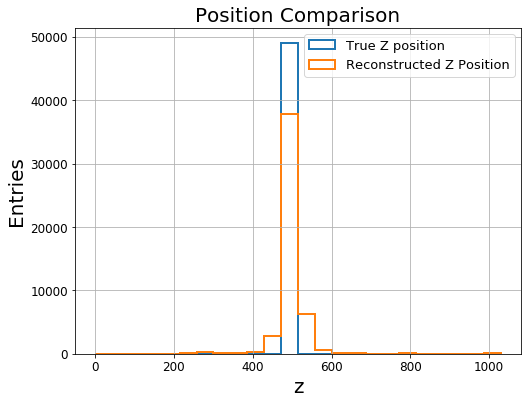

In [49]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(0,1030,25)
plt.hist(df_true_z.values, bins=BINS,histtype='step',lw=2,label='True Z position')
plt.hist(df_Correlation_prod_gamma_Sps['sps_z'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed Z Position')
plt.xlabel("z",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_z-df_Correlation_prod_gamma_Sps['sps_z']).values, bins=BINS,histtzpe='step',lw=2)
# plt.zlabel("Difference",fontsize=20)
# plt.zlabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('z-comparison_single_gamma.png', dpi=300)

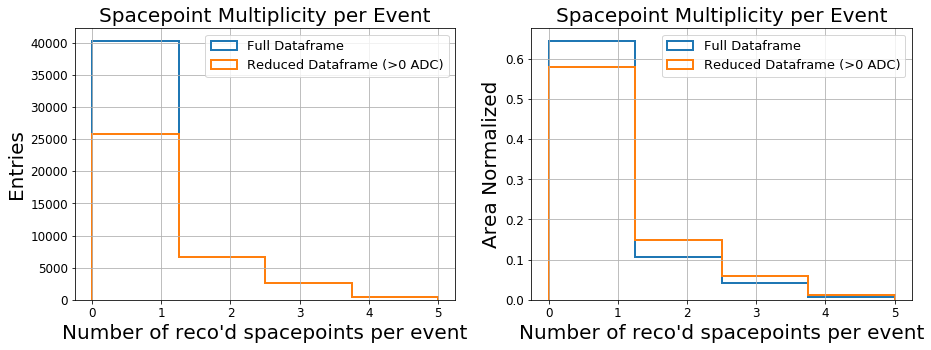

In [50]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_tree_prod_gamma['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Full Dataframe')
plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints per event",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()


plt.subplot(1, 2, 2)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_tree_prod_gamma['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Full Dataframe',density=True)
plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)',density=True)
plt.xlabel("Number of reco'd spacepoints per event",fontsize=20)
plt.ylabel('Area Normalized',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.show()
fig.savefig('N_Sps.png', dpi=300)

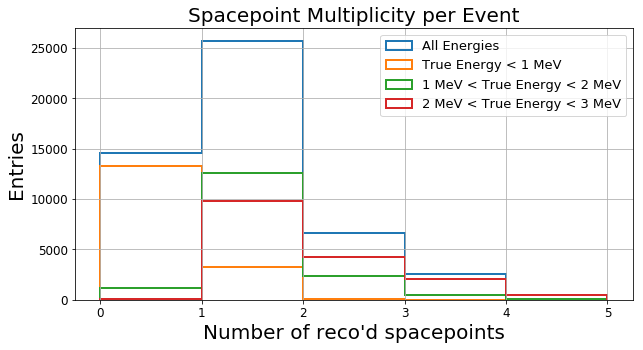

In [51]:
df_True_Energy_less_than_1 = df_Event_tree_prod_gamma.query('Event_Energy_total_MeV < 1.') 
df_True_Energy_bw_1_and_2 = df_Event_tree_prod_gamma.query('Event_Energy_total_MeV > 1. and Event_Energy_total_MeV < 2. ')
df_True_Energy_bw_2_and_3 = df_Event_tree_prod_gamma.query('Event_Energy_total_MeV > 2. and Event_Energy_total_MeV < 3. ')

fig = plt.figure(figsize=(10,5))

BINS = np.linspace(0,5,6)
plt.hist(df_Event_tree_prod_gamma['N_sps'].values, bins=BINS,histtype='step',lw=2,label='All Energies')
plt.hist(df_True_Energy_less_than_1['N_sps'].values, bins=BINS,histtype='step',lw=2,label='True Energy < 1 MeV')
plt.hist(df_True_Energy_bw_1_and_2['N_sps'].values, bins=BINS,histtype='step',lw=2,label='1 MeV < True Energy < 2 MeV')
plt.hist(df_True_Energy_bw_2_and_3['N_sps'].values, bins=BINS,histtype='step',lw=2,label='2 MeV < True Energy < 3 MeV')
# plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()

#plt.xticks(range(5))
plt.show()
fig.savefig('N_Sps_true_energy_function.png', dpi=300)

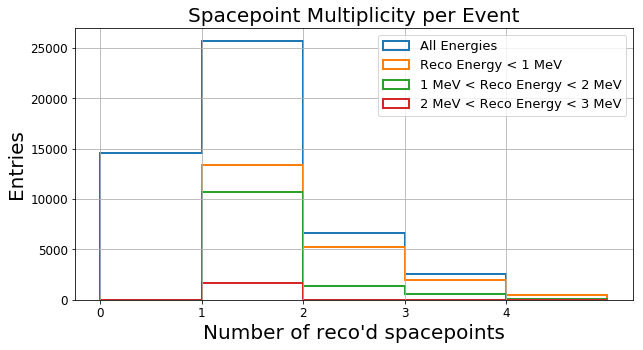

In [52]:

df_Reco_Energy_less_than_1 = df_charge_conversion.query('energy < 1.') 
df_Reco_Energy_bw_1_and_2 = df_charge_conversion.query('energy > 1. and energy < 2. ')
df_Reco_Energy_bw_2_and_3 = df_charge_conversion.query('energy > 2. and energy < 3. ')
fig = plt.figure(figsize=(10,5))

BINS = np.linspace(0,5,6)
plt.hist(df_Event_tree_prod_gamma['N_sps'].values, bins=BINS,histtype='step',lw=2,label='All Energies')
plt.hist(df_Reco_Energy_less_than_1['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reco Energy < 1 MeV')
plt.hist(df_Reco_Energy_bw_1_and_2['N_sps'].values, bins=BINS,histtype='step',lw=2,label='1 MeV < Reco Energy < 2 MeV')
plt.hist(df_Reco_Energy_bw_2_and_3['N_sps'].values, bins=BINS,histtype='step',lw=2,label='2 MeV < Reco Energy < 3 MeV')
# plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.xticks(range(5))
plt.show()
fig.savefig('N_Sps_recod_energy_function.png', dpi=300)

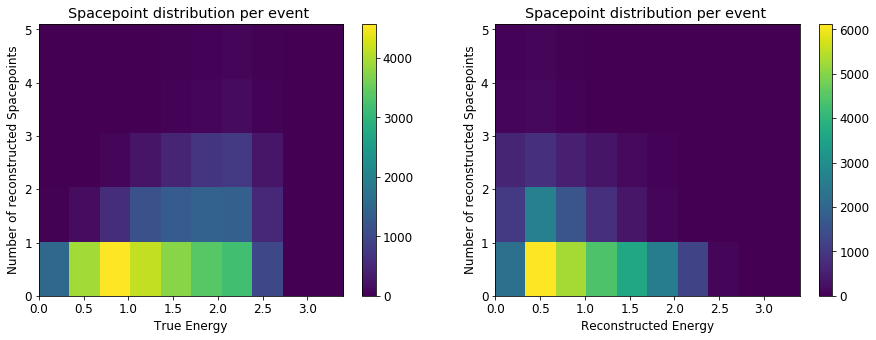

In [53]:
fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 12})
plt.subplot(1, 2, 1)
plt.hist2d(df_charge_conversion['Event_Energy_total_MeV'].values,df_charge_conversion['N_sps'].values, bins=(10,5), range=[[0,3.4], [0,5.1]])#, norm=LogNorm())
# plt.plot([0, 10], [0, 10], 'r-', lw=3)
plt.colorbar()
plt.ylabel('Number of reconstructed Spacepoints')
plt.xlabel('True Energy')
plt.title('Spacepoint distribution per event ')
plt.subplot(1, 2, 2)
plt.hist2d(df_charge_conversion['energy'].values,df_charge_conversion['N_sps'].values, bins=(10,5), range=[[0,3.4], [0,5.1]])#, norm=LogNorm())
# plt.plot([0, 10], [0, 10], 'r-', lw=3)
plt.colorbar()
plt.ylabel('Number of reconstructed Spacepoints')
plt.xlabel('Reconstructed Energy')
plt.title('Spacepoint distribution per event ')
plt.show()

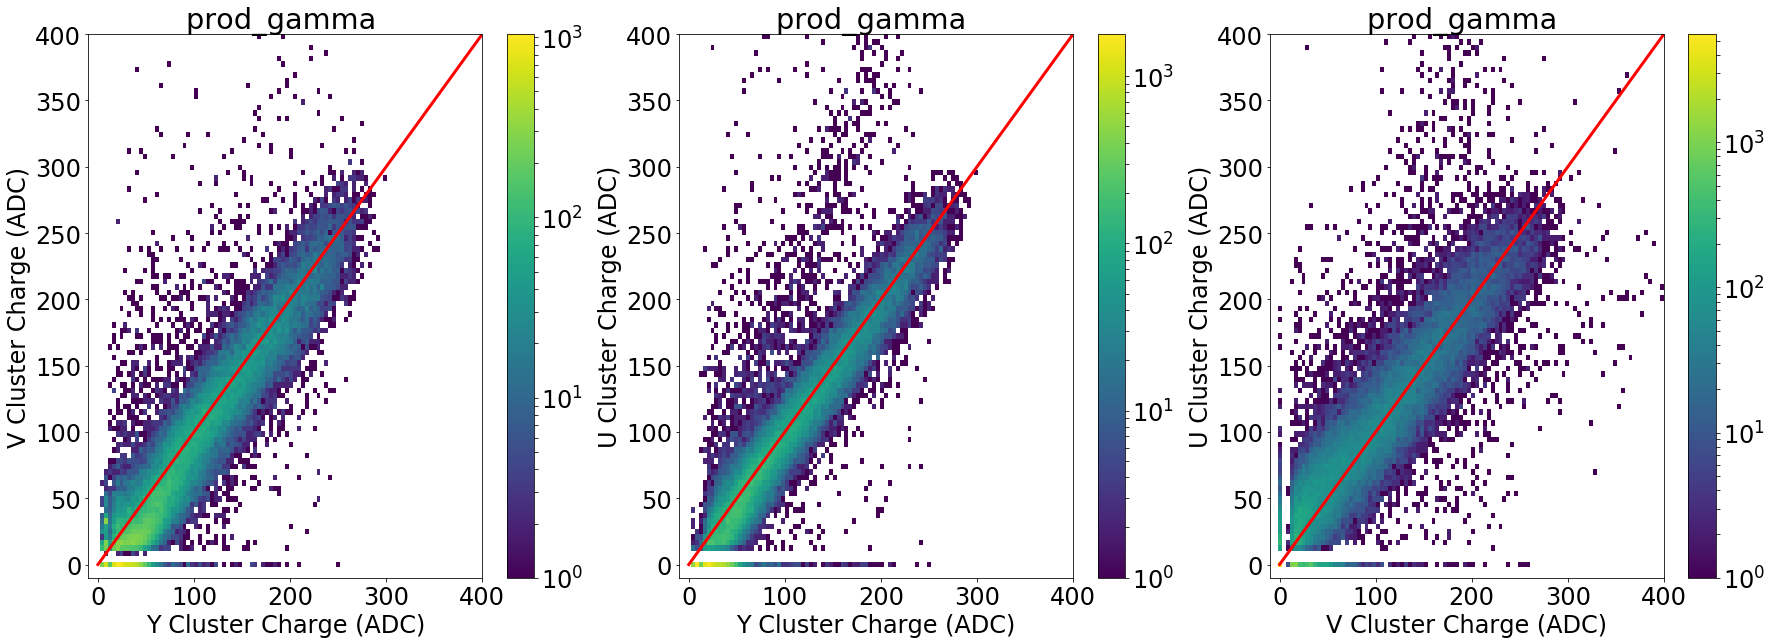

In [54]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_prod_gamma['Y_cluster_charge'].values,df_Matching_prod_gamma['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('prod_gamma ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_prod_gamma['Y_cluster_charge'].values,df_Matching_prod_gamma['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('prod_gamma ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_prod_gamma['V_cluster_charge'].values,df_Matching_prod_gamma['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('prod_gamma ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

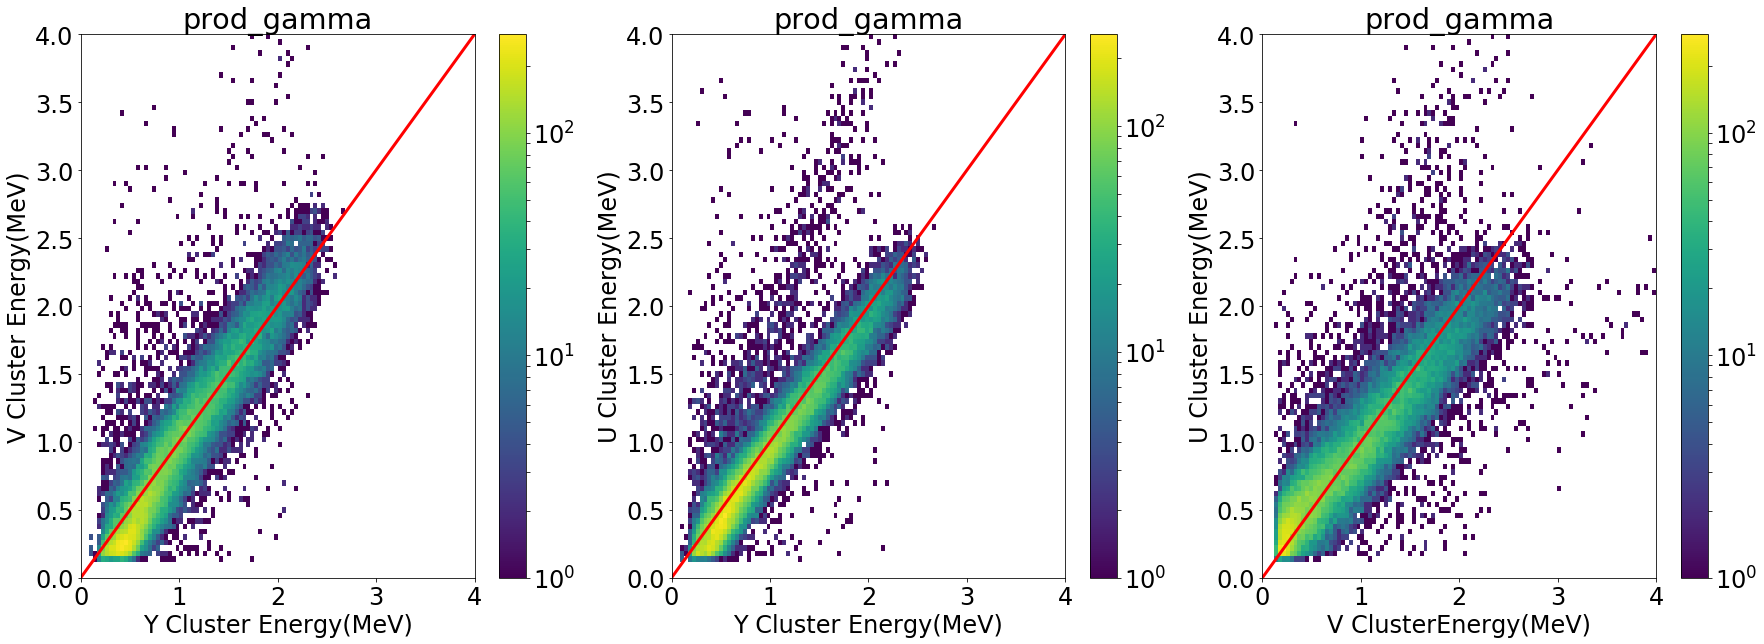

In [55]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 0.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >0. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >0. '

dfChargeCut_prod_gamma = df_Matching_prod_gamma.query(CUT)

dfChargeCut_prod_gamma['energyY_prod_gamma'] = E_recoY_prod_gamma(dfChargeCut_prod_gamma,238.4)
dfChargeCut_prod_gamma['energyU_prod_gamma'] = E_recoU_prod_gamma(dfChargeCut_prod_gamma,232)
dfChargeCut_prod_gamma['energyV_prod_gamma'] = E_recoV_prod_gamma(dfChargeCut_prod_gamma,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_prod_gamma['energyY_prod_gamma'].values,dfChargeCut_prod_gamma['energyV_prod_gamma'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('prod_gamma')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_prod_gamma['energyY_prod_gamma'].values,dfChargeCut_prod_gamma['energyU_prod_gamma'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('prod_gamma')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_prod_gamma['energyV_prod_gamma'].values,dfChargeCut_prod_gamma['energyU_prod_gamma'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('prod_gamma')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27prod_gamma